# Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
import shutil

# Download dataset from Kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 75 bytes


In [ ]:
!pip install kaggle
!kaggle datasets download -d ikarus777/best-artworks-of-all-time
!for z in *.zip; do unzip "$z"; done
!ls 

Streaming output truncated to the last 5000 lines.
  inflating: resized/resized/Henri_Rousseau_62.jpg  
  inflating: resized/resized/Henri_Rousseau_63.jpg  
  inflating: resized/resized/Henri_Rousseau_64.jpg  
  inflating: resized/resized/Henri_Rousseau_65.jpg  
  inflating: resized/resized/Henri_Rousseau_66.jpg  
  inflating: resized/resized/Henri_Rousseau_67.jpg  
  inflating: resized/resized/Henri_Rousseau_68.jpg  
  inflating: resized/resized/Henri_Rousseau_69.jpg  
  inflating: resized/resized/Henri_Rousseau_7.jpg  
  inflating: resized/resized/Henri_Rousseau_70.jpg  
  inflating: resized/resized/Henri_Rousseau_8.jpg  
  inflating: resized/resized/Henri_Rousseau_9.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_1.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_10.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_11.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_12.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_13.jpg

# Data Preprocessing and Visualization


In [ ]:
artists = pd.read_csv('artists.csv')
artists

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


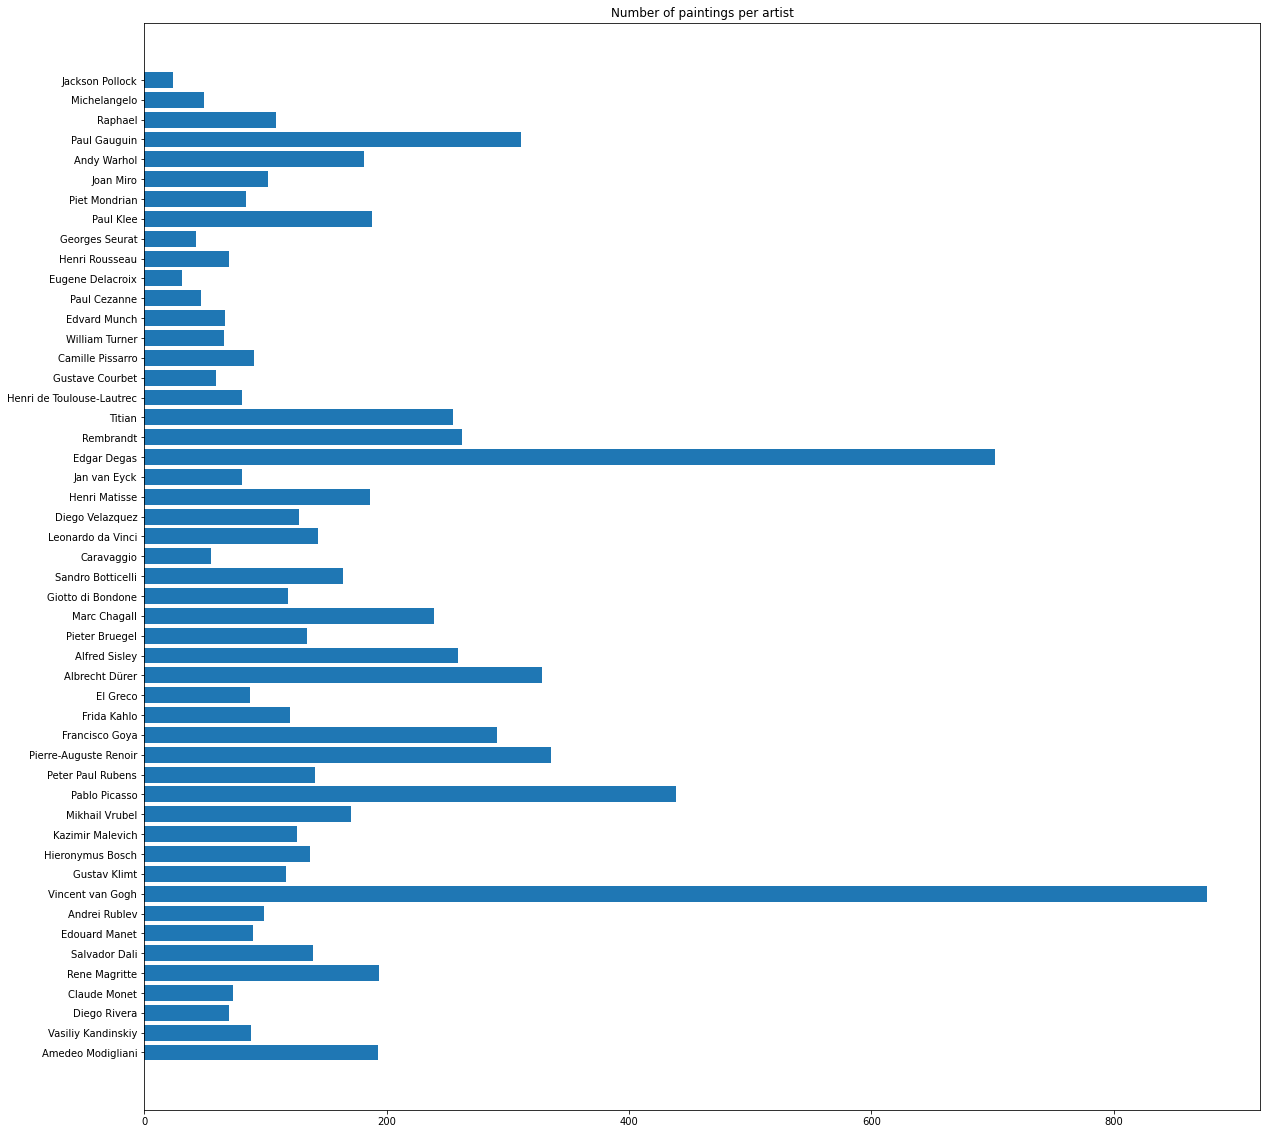

In [ ]:
names = artists['name']
paintings = artists['paintings']

fig = plt.figure(figsize = (20, 20))
plt.barh(names, paintings)
plt.title('Number of paintings per artist')

plt.show()

In [ ]:
artists = artists.sort_values(by = ['paintings'], ascending = False) 
artists

,id,name,years,genre,nationality,bio,wikipedia,paintings
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
30,30,Edgar Degas,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702
13,13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439
15,15,Pierre-Auguste Renoir,1841 - 1919,Impressionism,French,"Pierre-Auguste Renoir, commonly known as Augus...",http://en.wikipedia.org/wiki/Pierre-Auguste_Re...,336
19,19,Albrecht Dürer,1471 - 1528,Northern Renaissance,German,Albrecht Dürer (; German: [ˈʔalbʁɛçt ˈdyːʁɐ]; ...,http://en.wikipedia.org/wiki/Albrecht_Dürer,328
46,46,Paul Gauguin,1848 – 1903,"Symbolism,Post-Impressionism",French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311
16,16,Francisco Goya,1746 - 1828,Romanticism,Spanish,Francisco José de Goya y Lucientes (; Spanish:...,http://en.wikipedia.org/wiki/Francisco_Goya,291
31,31,Rembrandt,1606 - 1669,Baroque,Dutch,Rembrandt Harmenszoon van Rijn (; Dutch: [ˈrɛm...,http://en.wikipedia.org/wiki/Rembrandt,262
20,20,Alfred Sisley,1839 - 1899,Impressionism,"French,British",Alfred Sisley (; French: [sislɛ]; 30 October 1...,http://en.wikipedia.org/wiki/Alfred_Sisley,259
32,32,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,Tiziano Vecelli or Tiziano Vecellio (pronounce...,http://en.wikipedia.org/wiki/Titian,255


In [ ]:
artists = artists.drop(labels = 19, axis = 0)
artists_data = artists[artists['paintings'] >= 200]
artists_data = artists_data[['name', 'paintings']]
artists_data = artists_data.reset_index()
artists_data = artists_data.drop(['index'], axis = 1)

artists_data

,name,paintings
0,Vincent van Gogh,877
1,Edgar Degas,702
2,Pablo Picasso,439
3,Pierre-Auguste Renoir,336
4,Paul Gauguin,311
5,Francisco Goya,291
6,Rembrandt,262
7,Alfred Sisley,259
8,Titian,255
9,Marc Chagall,239


In [ ]:
shutil.rmtree('/content/resized')
shutil.rmtree('/content/images/images/Albrecht_DuтХа├кrer')
shutil.rmtree('/content/images/images/Albrecht_Du╠Иrer')
shutil.rmtree('/content/images/images/Amedeo_Modigliani')
shutil.rmtree('/content/images/images/Andrei_Rublev')
shutil.rmtree('/content/images/images/Andy_Warhol')
shutil.rmtree('/content/images/images/Camille_Pissarro')
shutil.rmtree('/content/images/images/Caravaggio')
shutil.rmtree('/content/images/images/Claude_Monet')
shutil.rmtree('/content/images/images/Diego_Rivera')
shutil.rmtree('/content/images/images/Diego_Velazquez')
shutil.rmtree('/content/images/images/Edouard_Manet')
shutil.rmtree('/content/images/images/Edvard_Munch')
shutil.rmtree('/content/images/images/El_Greco')
shutil.rmtree('/content/images/images/Eugene_Delacroix')
shutil.rmtree('/content/images/images/Frida_Kahlo')
shutil.rmtree('/content/images/images/Georges_Seurat')
shutil.rmtree('/content/images/images/Giotto_di_Bondone')
shutil.rmtree('/content/images/images/Gustav_Klimt')
shutil.rmtree('/content/images/images/Gustave_Courbet')
shutil.rmtree('/content/images/images/Henri_Matisse')
shutil.rmtree('/content/images/images/Henri_Rousseau')
shutil.rmtree('/content/images/images/Henri_de_Toulouse-Lautrec')
shutil.rmtree('/content/images/images/Hieronymus_Bosch')
shutil.rmtree('/content/images/images/Jackson_Pollock')
shutil.rmtree('/content/images/images/Jan_van_Eyck')
shutil.rmtree('/content/images/images/Joan_Miro')
shutil.rmtree('/content/images/images/Kazimir_Malevich')
shutil.rmtree('/content/images/images/Leonardo_da_Vinci')
shutil.rmtree('/content/images/images/Michelangelo')
shutil.rmtree('/content/images/images/Mikhail_Vrubel')
shutil.rmtree('/content/images/images/Paul_Cezanne')
shutil.rmtree('/content/images/images/Paul_Klee')
shutil.rmtree('/content/images/images/Peter_Paul_Rubens')
shutil.rmtree('/content/images/images/Piet_Mondrian')
shutil.rmtree('/content/images/images/Pieter_Bruegel')
shutil.rmtree('/content/images/images/Raphael')
shutil.rmtree('/content/images/images/Rene_Magritte')
shutil.rmtree('/content/images/images/Salvador_Dali')
shutil.rmtree('/content/images/images/Sandro_Botticelli')
shutil.rmtree('/content/images/images/Vasiliy_Kandinskiy')
shutil.rmtree('/content/images/images/William_Turner')

In [ ]:
artists_names = artists_data['name'].str.replace(' ', '_').values
artists_names

array(['Vincent_van_Gogh', 'Edgar_Degas', 'Pablo_Picasso',
       'Pierre-Auguste_Renoir', 'Paul_Gauguin', 'Francisco_Goya',
       'Rembrandt', 'Alfred_Sisley', 'Titian', 'Marc_Chagall'],
      dtype=object)

In [ ]:
from torchvision.transforms.transforms import RandomHorizontalFlip
transformed = T.Compose([
                T.Resize((224, 224)),
                T.ToTensor(), 
                T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
              ])

dataset = ImageFolder('/content/images/images', transform = transformed)

In [ ]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True, num_workers = 4)
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle = False, num_workers = 4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
pretrained = models.resnet50(pretrained = True).cuda()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
class NewResNet(nn.Module):
  def __init__(self, my_pretrained_model):
      super(NewResNet, self).__init__()
      self.pretrained = my_pretrained_model
      self.new_layers = nn.Sequential(nn.Linear(1000, 200),
                                          nn.ReLU(),
                                          nn.Linear(200, len(dataset.classes)),
                                          nn.ReLU())
  
  def forward(self, x):
      x = self.pretrained(x)
      x = self.new_layers(x)

      return x

In [ ]:
# Definiti numarul de epoci
epochs = 7

# Definiti reteaua
network = NewResNet(pretrained).cuda()

# Definiti optimizatorul
optimizer = optim.Adam(network.parameters(), lr = 1e-4)
# Dupa definirea optimizatorului si dupa fiecare iteratie trebuie apelata functia zero_grad().
# Aceasta face toti gradientii zero.
# Completati codul pentru a face gradientii zero aici


# Definiti functia cost pentru pentru regressie
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def test_acc(net: nn.Module, test_loader: DataLoader):
  net.eval()

  total = 0
  correct = 0

  for test_images, test_labels in test_loader:
    test_images = test_images.cuda()
    test_labels = test_labels.cuda()
    
    total += len(test_images)
    out_class = torch.argmax(net(test_images))
    correct += torch.sum(out_class == test_labels)

  return correct / total * 100


def train_fn(epochs: int, train_loader: DataLoader, test_loader: DataLoader, 
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
  # Iteram prin numarul de epoci
  for e in range(epochs):
    net.train()

    # Iteram prin fiecare batch din dataloader
    for images, labels in train_loader:
      images = images.cuda()
      labels = labels.cuda()
      # Aplicam reteaua neurala pe imaginile din batch-ul curent
      out = net(images)
      # Aplicam functia cost pe iesirea retelei neurale si pe etichetele imaginilor 
      loss = loss_fn(out, labels.cuda())
      # Aplicam algoritmul de back-propagation
      loss.backward()
      # Facem pasul de optimizare, pentru a actualiza parametrii retelei
      optimizer.step()
      # Apelam functia zero_grad() pentru a uita gradientii de la iteratie curenta
      optimizer.zero_grad()
    
    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))

    # Calculam acuratetea
    acc = test_acc(net, test_loader)
    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e + 1, acc))

In [ ]:
train_fn(epochs, train_loader, test_loader, network, loss_fn, optimizer)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Loss-ul la finalul epocii 0 are valoarea 0.6938298344612122
Acuratetea la finalul epocii 1 este 74.34%
Loss-ul la finalul epocii 1 are valoarea 0.41069987416267395
Acuratetea la finalul epocii 2 este 86.42%
Loss-ul la finalul epocii 2 are valoarea 0.14576983451843262
Acuratetea la finalul epocii 3 este 87.30%
Loss-ul la finalul epocii 3 are valoarea 0.7313967943191528
Acuratetea la finalul epocii 4 este 88.93%
Loss-ul la finalul epocii 4 are valoarea 0.11023695766925812
Acuratetea la finalul epocii 5 este 83.90%
Loss-ul la finalul epocii 5 are valoarea 0.19871672987937927
Acuratetea la finalul epocii 6 este 85.91%
Loss-ul la finalul epocii 6 are valoarea 0.34169092774391174
Acuratetea la finalul epocii 7 este 86.67%
